## Rappels Modèle Linéaire Multiple

* On suppose que l'on dispose d'observations indépendantes et identiquement distribuées,
$(X_1,Y_1),\ldots,(X_n,Y_n)$, avec $X_i = (X_i^{(1)},\ldots,X_i^{(p)})^T \in \mathbb{R}^p$ et $Y_i \in \mathbb{R}$.

* On cherche une fonction de régression $f$ **solution du critère des moindres carrés** :
$$
f^*  =  
        \arg \min_{f \in \mathcal{F}} \mathbb{E}\Big[ \big(Y - f(X) \big)^2 \Big]
$$

* On considère que $f$ est **linéaire** selon les composantes de $X \in \mathbb{R}^p$ :
$$
f(X) = \beta_0 + \sum_{j=1}^{p} \beta_j X^{(j)}
$$

*  On **estime** les paramètres $\beta$ (et donc $f$) en minimisant le critère des moindres carrés empiriques :
$$
\hat{\beta} = \arg \min \left\{\frac{1}{n} \sum_{i=1}^n \Big(Y_i - \beta_0 - \beta_1 X_i^{(1)} - \ldots -\beta_p X_i^{(p)}\Big)^2\right\}
$$

____

# Objectif

___
> ***On va s'intéresser ici à la problématique de sélection de variables.***
___

Nous supposons que nous avons des observations $(X_i,Y_i)$ où $X_i$ appartient à un esapce de dimension
assez grande mais où seules certaines dimensions parmi les $p$ ont une influence sur la prédiction de $Y$.

* D'une certaine façon nous supposons qu'il existe un sous ensemble d'indice $J \subset \{1,\ldots,p\}$ tel que :
$$
f(X) = \beta_0 + \sum_{j' \in J} \beta_{j'} X^{(j')}
$$

$\Rightarrow$ *L'objectif va être de trouver des méthodes permettant de sélectionner les "bonnes composantes".*

_____

___

# Création d'un jeu de données
1. Créez un vecteur $\beta = (2,\ldots,20)/5$.
2. Annulez 10 coefficients de $\beta$ de façon aléatoire (utilisez ``np.random.choice``)
3. Créez une matrice de points normalement distribués de dimensions $(100,19)$ (utilisez ``np.random.normal``)
4. Créez un vecteur d'observations

    $$ Y = 1 + X\beta + \varepsilon$$
      où
    * $\varepsilon \sim \mathcal{N}(0,\sigma I)$ avec
    * $\sigma = 4$

In [1]:
import numpy as np

beta = np.arange(2, 21)/5
print(beta)

[0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4 3.6 3.8
 4. ]


In [2]:
np.random.seed(42)
ind_null = np.random.choice(len(beta),10, replace=False)
beta[ind_null] = 0
beta

array([0. , 0. , 0.8, 0. , 1.2, 0. , 1.6, 1.8, 0. , 2.2, 2.4, 0. , 2.8,
       0. , 3.2, 0. , 0. , 0. , 4. ])

In [3]:
ind_non_null = np.setdiff1d(np.arange(len(beta)),ind_null)
beta[ind_null] = 0

#X = np.random.uniform(low=0.0, high=1.0, size=(100,19))
X = np.random.normal(size=(100,19))
epsilon = np.random.normal(size=100,scale=4)
intercept = np.ones(100)


In [4]:
Y = intercept + X@beta.transpose()+epsilon

In [6]:
Y

array([ -4.73344918,  -5.86635247,   4.25022014,   0.04057426,
         1.75110083,   0.96569221,  -1.4273531 ,   2.71548565,
        -6.94159044,   8.39405237,  -4.9845109 ,  -1.93277908,
         0.60339252,  -2.99883067,   9.17145884,  -7.86794569,
        -3.27614602,   7.45752484,   1.10388953,  -6.59912214,
       -11.20296921,  19.28974701,  -1.32322939,  11.80473296,
         3.51684907,   4.12586773,   8.03922736,  -2.54930298,
         9.28889809,  -3.80474072,   0.27210669,   7.71537225,
         0.0348489 ,  10.88599729,   5.6775138 ,   3.80753244,
         6.907924  ,   6.81305484,  -8.63608749,  -9.09568582,
        19.04465443,   0.91738144,   0.34833403,  16.78652551,
        -5.28981786,  -6.31601187,   7.54565035,   1.07065446,
         2.23368224,   6.94022858,   0.7734175 ,  -6.11622213,
         4.87630614,  21.84795878,   5.18204009,   6.55346312,
        12.0398987 ,  -9.06577522,  -8.4481702 ,  -4.58756098,
         8.92488717,   6.92469271,   0.15111463,  17.61

___
# Ajustement d'un modèle de régression linéaire
1. Ajustez un modèle de régression linéaire à l'aide de scikitlearn (``from sklearn.linear_model import LinearRegression``)
2. Faire varier $\sigma$ et interprétez le résultats
3. Proposez une stratégie de sélection de variables

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
LR = LinearRegression()
LR.fit(X,Y)
print(LR.coef_[ind_null])
print(LR.coef_[ind_non_null],beta[ind_non_null])

[ 0.17160519  0.32574809 -0.41171498 -0.0733864  -0.31979141 -0.51148331
 -0.22983791 -0.04150073  0.53368217  0.36730834]
[0.49428244 0.68088332 1.05097757 2.43215046 2.25306493 2.92916654
 2.48797472 2.78763985 4.13527168] [0.8 1.2 1.6 1.8 2.2 2.4 2.8 3.2 4. ]


In [9]:
import pandas as pd

In [10]:
def simu_XY(sigma,theta=beta) :

    np.random.seed(42)
    ind_null = np.random.choice(len(theta),10, replace=False)
    theta[ind_null] = 0

    #X = np.random.uniform(low=0.0, high=1.0, size=(100,19))
    X = np.random.normal(size=(100,19))
    epsilon = np.random.normal(size=100,scale=sigma)
    intercept = np.ones(100)

    Y = intercept + X@theta.transpose()+epsilon

    return X,Y

In [11]:
X,Y = simu_XY(4)
LR.fit(X,Y)
LR.coef_

print(LR.score(X,Y))
#print(LR.coef_[ind_null])
pd.DataFrame(
    np.array([
        LR.coef_,
        beta]).transpose(),
    columns = ["coef_","true"]
)

0.7613645668047764


,coef_,true
0,0.171605,0.0
1,-0.073386,0.0
2,0.494282,0.8
3,-0.229838,0.0
4,0.680883,1.2
5,0.325748,0.0
6,1.050978,1.6
7,2.432150,1.8
8,-0.319791,0.0
9,2.253065,2.2


___

## Stratégie de Selction de variable "Backward stepwise"

____
**Backward stepwise selection**
___
>
>1. Soit $\mathcal{M}_p$ le modèle complet avec tous les prédicteurs
>
>2. Pour $k$ variant de $p$ à $1$ :
>
>    a) Préparer un échantillon d'apprentissage et de validation
>        
>    b) Considérer tous les modèles qui contiennent tous les prédicteurs sauf $1$
>    (autrement dit : tous les modèles qui contiennent k-1 prédicteurs)
>
>
>    c) Choisir le meilleur de ces modèles (soit la plus petite erreur résiduelle, soit le meilleur $R^2$)
>    (selon l'échantillon d'apprentissage). On le notera $\mathcal{M}_{k-1}$.    
>
>    d) Calculer un critère d'erreur de prédiction de $\mathcal{M}_{k-1}$ sur un échantillon de validation
>
> 3. Sélectionner le modèle $\mathcal{M}_k$ avec la plus petite erreur de prédiction
___

4. Implémentez cette stratégie

Commencez par implémenter une fonction réalisant les étapes 2 b) et 2 c)
```python
def backward_one_step(X,Y,estimator,scoring):
    p = X.shape[1]
    all_scores = []    
    for j in range(p):

      
        ...
        ...
    return j_opt

    
```
Elle prend en entrée :
* $X$
* $Y$
* un estimator comme ``LinearRegression`` (de scikitlearn)
* une fonction de score
et qui retourne :
* j_opt l'indice pour lequel le modèle est le "meilleur"

On pourra s'aider de la fonction :``np.delete`` de la librarie numpy qui permet de supprimer la colonne d'une matrice
On utilisera la fonction ``r2_score`` de sklearn.metrics




In [12]:
from sklearn.model_selection import train_test_split

def backward_one_step(X,Y,estimator,scoring):
    p = X.shape[1]
    all_scores = []
    for j in range(p):
        X_tmp = np.delete(X, j, axis=1)
        estimator.fit(X_tmp,Y)
        Y_pred_tmp = estimator.predict(X_tmp)
        score_tmp = scoring(Y,Y_pred_tmp)
        all_scores += [score_tmp]
    j_opt = np.argmin(all_scores)
    return j_opt

In [13]:
def backward_stepwise(X,Y,estimator,scoring):

    p = X.shape[1]
    my_list = list(range(p))

    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2, random_state=42)

    estimator.fit(X_train,Y_train)
    Y_pred_val = estimator.predict(X_val)
    all_scores = []

    removed_list = []

    for j in range(p-1):
        X_train , Y_train = X,Y
        X_val , Y_val = X,Y

        j_iter = backward_one_step(X_train,Y_train,estimator,scoring)
        X = np.delete(X, j_iter, axis=1)
        removed_list += [my_list[j_iter]]
        X_train = np.delete(X_train, j_iter, axis=1)
        X_val = np.delete(X_val, j_iter, axis=1)

        #print(j_iter,my_list[j_iter])
        my_list = np.delete(my_list, j_iter)
        #print(my_list)
        estimator.fit(X_train,Y_train)

        Y_pred_val = estimator.predict(X_val)
        all_scores += [scoring(Y_val,Y_pred_val)]

    return all_scores,removed_list


In [14]:
from sklearn.metrics import r2_score
res = backward_stepwise(X,Y,LinearRegression(),r2_score)

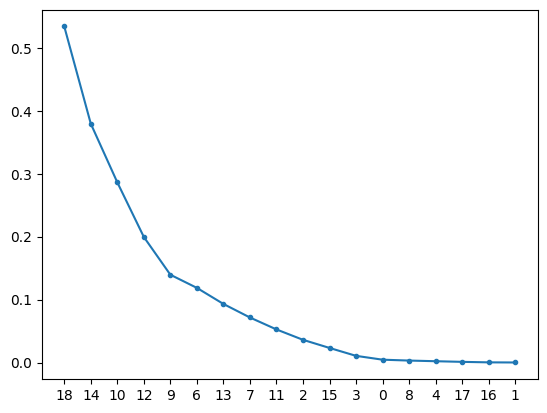

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
_ = plt.plot(res[0],'.-')
_ = plt.xticks(ticks=range(len(res[1])), labels=res[1])

In [16]:
np.sort(ind_null)

array([ 0,  1,  3,  5,  8, 11, 13, 15, 16, 17])

In [17]:
np.sort(res[1][-10:])

array([ 0,  1,  2,  3,  4,  8, 11, 15, 16, 17])

___
# Régression Ridge

## Rappel \& Principe

Au lieu de chercher un sous ensemble de coefficients non nuls dans les $2^p$ sous-ensembles possibles, ***on peut directement construire un critère adapté au problème.***

$\Rightarrow$ Pour cela, **on ajoute un terme de régularisation qui va permettre de réduire la valeur des coefficients vers 0.** (*shrinkage methods*)

* Pour la régression Ridge, on cherche à minimiser :
$$
\hat{\beta} = \arg \min \left\{\sum_{i=1}^n \Big(Y_i - \beta_0 - \beta_1 X_i^{(1)} - \ldots -\beta_p X_i^{(p)}\Big)^2
+
\lambda
\sum_{j=1}^p{\beta_j}^2
\right\}
$$

## Application

a) Appliquer la régression Ridge (utilisez l'estimator ``Ridge`` de sklearn.linear_model)

b) Visualiser l'évolotion de l'estimation des coefficients en fonction de la valeur de $\lambda$

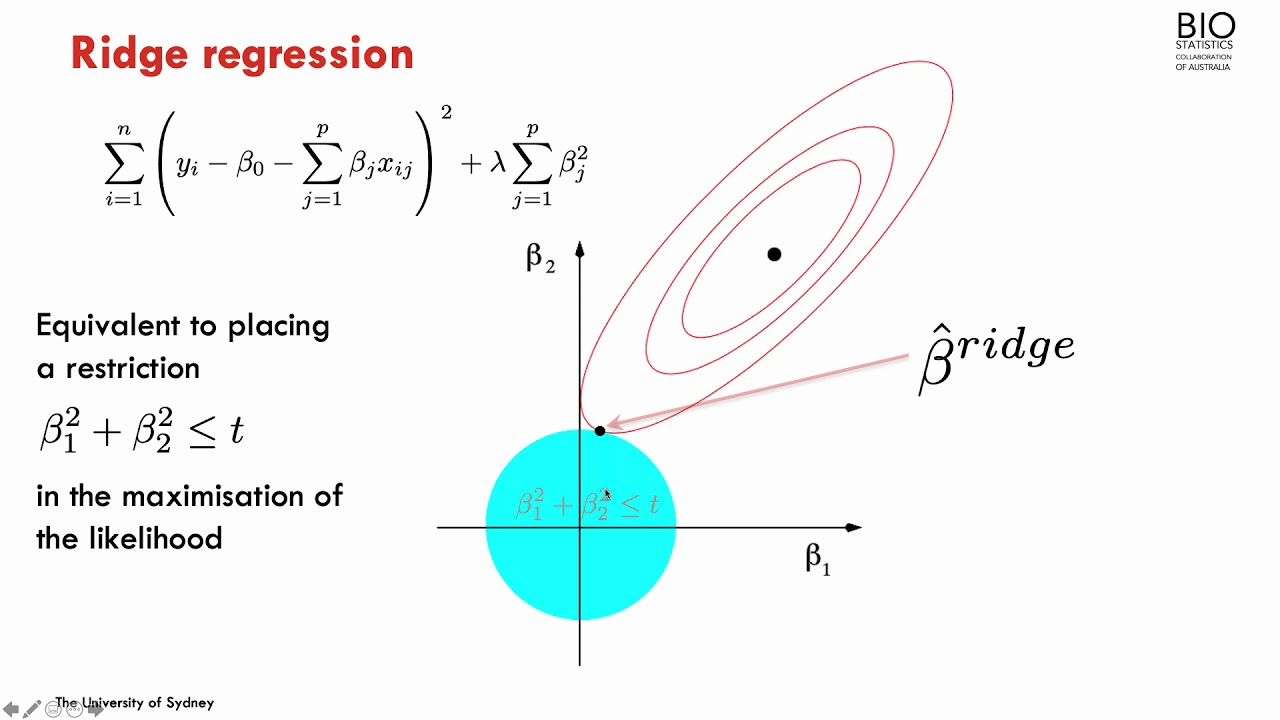

In [18]:
from sklearn.linear_model import Ridge

In [19]:
ridge_reg = Ridge(alpha=100.)

In [20]:
ridge_reg.fit(X,Y)

Ridge(alpha=100.0)

In [21]:
print(LR.score(X,Y))
#print(LR.coef_[ind_null])
pd.DataFrame(
    np.array([
        beta,
        LR.coef_,
        ridge_reg.coef_]).transpose(),
    columns = ["true","coef_lr","coef_ridge"]
)

0.7613645668047764


,true,coef_lr,coef_ridge
0,0.0,0.171605,0.254558
1,0.0,-0.073386,-0.000889
2,0.8,0.494282,0.374054
3,0.0,-0.229838,0.200341
4,1.2,0.680883,0.241444
5,0.0,0.325748,0.090802
6,1.6,1.050978,0.604742
7,1.8,2.432150,0.936977
8,0.0,-0.319791,0.037479
9,2.2,2.253065,0.918845


In [22]:
n_alphas = 200
alphas = np.logspace(-1, 3.5, n_alphas)

coefs = []
for a in alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X, Y)
    #coefs.append(ridge.coef_/np.sqrt(np.sum(ridge.coef_**2)))
    coefs.append(ridge.coef_)

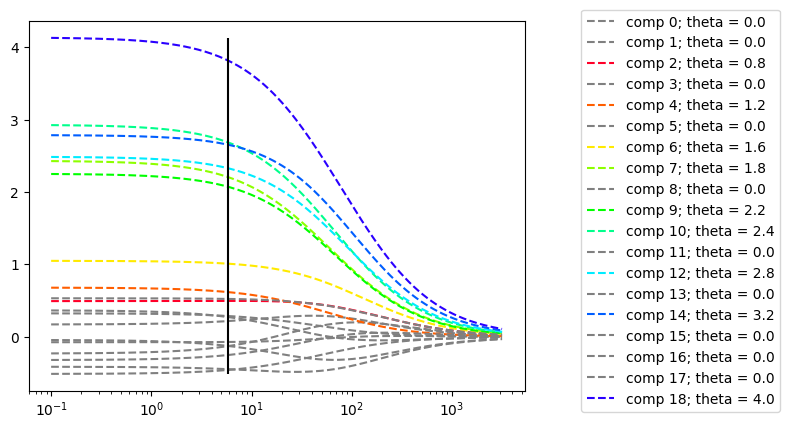

In [23]:
cm = plt.get_cmap('gist_rainbow')
color=[cm(1.*i/10) for i in range(10)]
j=0

for i in range(19):
    if i in ind_null:
        c = "gray"
        plt.plot(alphas,np.array(coefs)[:,i],color=c,linestyle="--")
    if i in ind_non_null:
        c = color[j]
        j+=1
        plt.plot(alphas,np.array(coefs)[:,i],color=c,linestyle="--")

plt.gca().set_xscale('log')
plt.legend([f"comp {i}; theta = {beta_i}" for (i,beta_i) in zip(range(len(beta)),beta)]
           ,bbox_to_anchor=(1.1, 1.05))

from sklearn.linear_model import RidgeCV
ridge_cv = RidgeCV(alphas=alphas).fit(X, Y)
plt.vlines(ridge_cv.alpha_,np.min(coefs),np.max(coefs),color="k")

___
# Régression LASSO

## Rappel \& Principe

**La pénalité $\ell^2$ de la régression Ridge permet de réduire tous les coefficients vers 0 mais il n'y aura pas de sous ensemble nuls.**

***$\Rightarrow$ Ainsi au lieu d'utiliser une pénalisation $\ell^2$, on utilise ici une pénalisation de type $\ell^1$. Cela permet bien d'avoir des sous-ensembles de coefficients nuls.***

* Pour la régression LASSO, on cherche à minimiser :
$$
\hat{\beta} = \arg \min \left\{\sum_{i=1}^n \Big(Y_i - \beta_0 - \beta_1 X_i^{(1)} - \ldots -\beta_p X_i^{(p)}\Big)^2
+
\lambda
\sum_{j=1}^p|\beta_j|
\right\}
$$

## Application

a) Appliquer la régression LASSO

b) Visualiser l'évolotion de l'estimation des coefficients en fonction de la valeur de $\lambda$

In [24]:
from sklearn.linear_model import Lasso

In [25]:
n_alphas = 200
alphas = np.logspace(-1, 1, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X, Y)
    #coefs.append(ridge.coef_/np.sqrt(np.sum(ridge.coef_**2)))
    coefs.append(lasso.coef_)

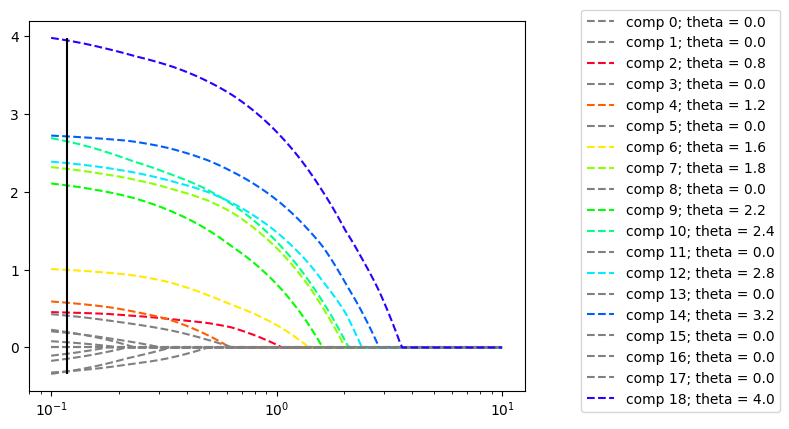

In [26]:
cm = plt.get_cmap('gist_rainbow')
color=[cm(1.*i/10) for i in range(10)]
j=0

for i in range(19):
    if i in ind_null:
        c = "gray"
        plt.plot(alphas,np.array(coefs)[:,i],color=c,linestyle="--")
    if i in ind_non_null:
        c = color[j]
        j+=1
        plt.plot(alphas,np.array(coefs)[:,i],color=c,linestyle="--")

plt.gca().set_xscale('log')
plt.legend([f"comp {i}; theta = {beta_i}" for (i,beta_i) in zip(range(len(beta)),beta)]
           ,bbox_to_anchor=(1.1, 1.05))

from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(alphas=alphas).fit(X, Y)
plt.vlines(lasso_cv.alpha_,
           np.min(coefs),
           np.max(coefs),
           color="k")